In [1]:
! pip install langchain openai langchain-community

  Using cached langchain-0.3.20-py3-none-any.whl (1.0 MB)
  Using cached openai-1.66.3-py3-none-any.whl (567 kB)
  Using cached langchain_community-0.3.19-py3-none-any.whl (2.5 MB)
  Using cached PyYAML-6.0.2-cp310-cp310-win_amd64.whl (161 kB)
  Using cached langchain_text_splitters-0.3.6-py3-none-any.whl (31 kB)
  Using cached langsmith-0.3.15-py3-none-any.whl (343 kB)
  Using cached langchain_core-0.3.45-py3-none-any.whl (415 kB)
  Using cached sqlalchemy-2.0.39-cp310-cp310-win_amd64.whl (2.1 MB)
  Using cached async_timeout-4.0.3-py3-none-any.whl (5.7 kB)
  Using cached distro-1.9.0-py3-none-any.whl (20 kB)
  Using cached jiter-0.9.0-cp310-cp310-win_amd64.whl (208 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
  Using cached pydantic_settings-2.8.1-py3-none-any.whl (30 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl (7.8 kB)
  Using cached dataclasses_json-0.6.7-p

ERROR: Could not install packages due to an OSError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'C:\\Users\\user\\Desktop\\agent\\venv\\Lib\\site-packages\\numpy\\random\\tests\\test_generator_mt19937_regressions.py'
Check the permissions.

You should consider upgrading via the 'C:\Users\user\Desktop\agent\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
! python.exe -m pip install --upgrade pip

In [3]:
! pip install langchain_core typing_extensions

In [1]:
import os 
from dotenv import load_dotenv

load_dotenv("C:/Users/user/Desktop/agent/.env")
# os.getenv("OPENAI_API_KEY")


True

In [7]:
! pip install langchain_experimental

  Using cached langchain_experimental-0.3.4-py3-none-any.whl.metadata (1.7 kB)
Using cached langchain_experimental-0.3.4-py3-none-any.whl (209 kB)


# 보고서를 작성하면서 작성 결과를 이메일로 작성해주는 Agent

In [2]:
import operator
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage


# 상태 정의
class AgentState(TypedDict):
    messages: Annotated[
        Sequence[BaseMessage], operator.add
    ]  # Agent 간 공유하는 메시지 목록
    sender: Annotated[str, "The sender of the last message"]  # 마지막 메시지의 발신자

In [3]:
# 도구 정의 

from typing import Annotated,Optional, List

from langchain_community.tools import TavilySearchResults
from langchain_core.tools import tool
from langchain_experimental.utilities import PythonREPL

In [4]:
import os
from dotenv import load_dotenv
from tavily import TavilyClient
load_dotenv("C:/Users/user/Desktop/agent/.env") 

from langchain.tools import tool
import os
from tavily import TavilyClient

tavily_client = TavilyClient(api_key=os.getenv("TAVILY_API_KEY"))

@tool
def tavily_search(query: str) -> str:
    """
    주어진 질문을 Tavily로 검색하고 결과를 텍스트로 반환합니다.
    """
    search_results = tavily_client.search(
        query=query, 
        max_results=5, 
        search_depth="advanced", 
        include_raw_content=True
    )

    aggregated_results = "\n\n".join([
        f"제목: {res['title']}\n링크: {res['url']}\n내용: {res['content']}"
        for res in search_results['results']
    ])

    return aggregated_results






In [101]:
! pip install tavily-python

  Using cached tavily_python-0.5.1-py3-none-any.whl.metadata (91 kB)
Using cached tavily_python-0.5.1-py3-none-any.whl (43 kB)


In [29]:
! pip install -qU duckduckgo-search

In [26]:
! pip install langchain_community

In [36]:
# 뉴스 검색 툴 

from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults

wrapper = DuckDuckGoSearchAPIWrapper(region="ko-kr", time="d", max_results=5)

search = DuckDuckGoSearchResults(api_wrapper=wrapper, source="news", output_format="list")

print(search.invoke("김수현"))

[{'snippet': "배우 '김수현'씨를 둘러싼 논란에 방송가의 고심도 깊어지고 있습니다. 김수현 씨가 등장한 예능 프로그램은 사과문을 발표했고, 제작비 600억 원이 투입된 차기작 드라마에도 이목이 쏠립니다. MBC 예능 프로그램 '굿데이'가 ...", 'title': '[잇슈 컬처] 김수현 출연 예능 공식 사과…600억 원 투입된 드라마는? | Kbs 뉴스', 'link': 'https://news.kbs.co.kr/news/view.do?ncd=8202974'}, {'snippet': '김새론 유족 측은 김수현 소속사 골드메달리스트가 지난해 5월 \'7억원을 변제하지 않으면 법적 대응 할 것\'이란 내용의 1차 내용증명을 보냈다고 설명했다. 부 변호사는 "2차 내용증명에는 향후 SNS (소셜네트워크서비스)에 이런 사진을 올리거나 소속사 중 어느 누구와 접촉을 하거나 드라마 (당시 ...', 'title': '"김수현 측, 김새론에 \'눈물의 여왕 손해 보면 배상\' 2차 내용증명 보냈다" - 머니투데이', 'link': 'https://news.mt.co.kr/mtview.php?no=2025031719252731784'}, {'snippet': '사진=텐아시아DB 고(故) 김새론 측이 김수현 측에게 2차 내용증명을 받았다고 폭로했다. 김새론 유족의 법률대리인인 법무법인 부유의 부지석 대표 ...', 'title': '종합 故 김새론 김수현 지켜주려 했는데…유족 측 2차 내용증명→친동생 증언 폭로 | 텐아시아', 'link': 'https://tenasia.hankyung.com/article/2025031802774'}, {'snippet': '김수현의 소속사 골드메달리스트는 지난 14일 "김수현 씨는 김새론 씨가 성인이 된 후인 2019년 여름부터 2020년 가을까지 교제했다"며 "미성년자 시절 ...', 'title': '\'흑백요리사2\' 백종원 손절?…\'굿데이\'는 "김수현 최대한 편집"', 'link': 'https://www.dailia

In [43]:
print(len(search.invoke("김수현")))

4


In [ ]:
@tool
def duckduckgo_news_search(query: str, region: str = "ko-kr", max_result: int = 5) -> List[dict]:
    """_summary_

    Args:
        query (str): input text search 
        region (str, optional): region . Defaults to "ko-kr".
        max_result (int, optional): result len. Defaults to 5.

    Returns:
        List[dict]: news list
    """

    return results

In [19]:
import requests
from langchain.tools import tool
from typing import Dict 
from langchain.schema import Document
from langchain_openai import ChatOpenAI
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.chains import load_summarize_chain
from langchain_core.prompts import PromptTemplate
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchResults
from bs4 import BeautifulSoup as bs 

@tool
def content_crawler(query: str, region: str = "ko-kr", max_result: int = 5) -> List[Dict]:
    """
    사용자의 검색어를 기반으로 DuckDuckGo에서 뉴스 검색 후, 웹 페이지 내용을 크롤링하여 요약.

    Args:
        query (str): 사용자가 입력한 검색어
        region (str, optional): 검색 지역. 기본값은 "ko-kr" (한국).
        max_result (int, optional): 검색할 최대 결과 개수. 기본값은 5.

    Returns:
        List[Dict]: 요약된 뉴스 데이터 리스트
    """
    try:
        # LangChain LLM 모델 설정
        llm = ChatOpenAI(temperature=0, model="gpt-4o-mini-2024-07-18")

        # DuckDuckGo 검색 API 설정
        wrapper = DuckDuckGoSearchAPIWrapper(region=region, time="d", max_results=max_result) 
        search = DuckDuckGoSearchResults(api_wrapper=wrapper, source="news", output_format="list")
        results = search.run(query)
        
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36"
        }

        summaries = []  # 요약 결과를 저장할 리스트
        
        for result in results:
            url = result["link"]

            # HTTP 요청하여 페이지 크롤링
            response = requests.get(url, headers=headers, timeout=10)
            soup = bs(response.text, "lxml")
            text_content = soup.get_text(separator="\n", strip=True)

            # 텍스트 분할
            text_splitter = RecursiveCharacterTextSplitter(
                separators=["\n\n", "\n"], chunk_size=10000, chunk_overlap=500
            )
            split_texts = text_splitter.split_text(text_content)

            # ✅ 수정된 부분: Document 객체로 변환
            docs = [Document(page_content=text) for text in split_texts]

            # 요약 프롬프트 설정
            map_prompt = """
            해당 chunk된 내용을 자세하게 요약해주세요:
            "{text}"
            요약문:
            """
            map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

            # 요약 체인 설정
            summary_chain = load_summarize_chain(
                llm=llm,
                chain_type='map_reduce',
                map_prompt=map_prompt_template,
                combine_prompt=map_prompt_template,
                verbose=False
            )

            # 요약 실행
            output = summary_chain.invoke({"input_documents": docs})["output_text"]
            summaries.append({"url": url, "summary": output})

        return [i["summary"] for i in summaries]

    except Exception as e:
        return [{"error": str(e)}]


In [20]:
content_crawler("김수현")

['故 김새론의 유족이 김수현에게 2차 내용 증명을 받았다는 사실이 드러났다. 김새론의 대리인인 부지석 변호사는 이 내용 증명이 이사 중 발견되었으며, 김새론이 처음 받은 내용 증명에 의구심을 품고 김수현에게 연락을 시도했으나 응답이 없었다고 밝혔다. 2차 내용 증명에는 김새론에게 연락하지 말라는 내용이 포함되어 있었다. 김새론은 김수현을 신뢰했으나 이 사실을 가족에게 알리지 않았고, 결국 힘든 상황에서 잘못된 선택을 한 것으로 보인다. 이에 대해 누리꾼들은 김새론의 어려움을 이해해주길 바라는 반응을 보였다. 반면, 김수현의 소속사는 두 사람의 교제 사실을 부인하고 있으며, 유족 측은 2015년부터 약 6년간 만났다고 주장하고 있다. 또한, 한 유튜버는 김수현이 미성년자와의 교제를 인정하지 않으면 증거를 공개하겠다고 경고했다.',
 '김수현과 고 김새론의 유족 간 갈등이 심화되며 고인의 사생활이 공개되고 있다. 유족은 김수현의 사과를 요구하고 김새론과의 관계를 폭로하려 하고, 김수현 측은 이를 반박하고 있다. 최근 유튜브에서 김새론과 김수현의 데이트 영상이 공개되었으나, 김수현 소속사는 사실이 아니라고 주장하고 있다. 유족은 김새론이 2015년부터 김수현과 교제했다고 주장하지만, 소속사는 2019년부터의 교제를 주장하며 해명하지 않고 있다. 이로 인해 대중의 신뢰가 떨어지고 있으며, 고인의 사생활이 언론에 의해 대대적으로 보도되고 있다. 고 김새론은 생전에는 자신의 관계를 알리지 않았던 것으로 보인다.',
 '김수현과 고(故) 김새론의 유족 간 갈등이 심화되고 있다. 갈등의 핵심은 두 사람의 교제 시기에 대한 의견 차이로, 유족 측은 2015년부터 6년간 교제했다고 주장하며 공개 사과를 요구하고 있는 반면, 김수현 측은 2019년 여름부터 2020년 가을까지 교제했다고 주장하고 있다. 유족 측은 과거 사진 자료를 제시하며 주장을 뒷받침하고 있으며, 김수현 측은 이를 반박하고 있다. 김수현의 소속사 골드메달리스트는 유족 측의 주장을 허위 사실 유포로 간주하고 공

In [13]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from langgraph.graph import MessagesState


def make_system_prompt(suffix: str) -> str:
    return (
        "You are a helpful AI assistant, collaborating with other assistants."
        " Use the provided tools to progress towards answering the question."
        " If you are unable to fully answer, that's OK, another assistant with different tools "
        " will help where you left off. Execute what you can to make progress."
        " If you or any of the other assistants have the final answer or deliverable,"
        " prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{suffix}"
    )


# LLM 정의
researcher = ChatOpenAI(model="gpt-4o-2024-11-20")

# Research Agent 생성
research_agent = create_react_agent(
    researcher,
    tools=[tavily_search],
    state_modifier=make_system_prompt(
        "You are a research assistant specializing in general information retrieval and analysis. "
        "Your primary role is to gather, analyze, and summarize research materials. "
        "However, if the request explicitly involves news, do NOT process it yourself. "
        "Instead, respond with: '뉴스 관련 요청입니다. news_researcher에게 작업을 위임합니다.' "
        "For all other research tasks, retrieve relevant information and provide well-structured insights."
    ),
)


# Research Agent 노드 정의
def research_node(state: MessagesState) -> MessagesState:
    result = research_agent.invoke(state)

    # 마지막 메시지를 HumanMessage 로 변환
    last_message = HumanMessage(
        content=result["messages"][-1].content, name="researcher"
    )
    return {
        # Research Agent 의 메시지 목록 반환
        "messages": [last_message],
    }


In [21]:
news_search = ChatOpenAI(model="gpt-4o-mini-2024-07-18")


news_research_agent = create_react_agent(
    news_search,
    tools=[content_crawler],
    state_modifier=make_system_prompt(
        "You are a specialized news research assistant responsible for searching, crawling, and summarizing news articles. "
        "Your goal is to provide concise, fact-based summaries without adding personal opinions or interpretations. "
        "You do NOT handle general research tasks. "
        "If the request is NOT related to news, respond with: '일반 자료조사 요청입니다. researcher에게 작업을 위임합니다.' "
        "For news-related tasks, extract and summarize key information objectively."
        " After you finish summarizing, clearly add '최종 markdown 정리 완료' at the end of your response."
    ),
)


def news_research_node(state: MessagesState) -> MessagesState:
    result = news_research_agent.invoke(state)

    # 마지막 메시지를 HumanMessage 로 변환
    last_message = HumanMessage(
        content=result["messages"][-1].content, name="news_researcher"
    )
    return {
        # News Research Agent의 메시지 목록 반환
        "messages": [last_message],
    }

In [15]:
markdown_model = ChatOpenAI(model="gpt-3.5-turbo-0125")

markdown_agent = create_react_agent(
    markdown_model,
    tools=[],  # 도구가 필요 없는 순수 Markdown 변환용
    state_modifier=make_system_prompt(
        "Your sole task is converting provided information into clean, organized Markdown format."
        " Clearly structure the content using headings, bullet points, and proper Markdown syntax."
    ),
)

def markdown_node(state: MessagesState) -> MessagesState:
    result = markdown_agent.invoke(state)

    # 결과 메시지를 HumanMessage로 변환 (선택적으로 AIMessage로도 가능)
    last_message = HumanMessage(
        content=result["messages"][-1].content, name="markdown_formatter"
    )
    return {
        "messages": [last_message],
    }

In [28]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver

graph = StateGraph(MessagesState)

# 노드 추가
graph.add_node("researcher", research_node)
graph.add_node("news_researcher", news_research_node)
graph.add_node("markdown_formatter", markdown_node)

def route(state: MessagesState):
    last_message = state["messages"][-1].content.lower()

    if "최종 markdown 정리 완료" in last_message:
        return "markdown"
    elif "일반 자료조사 요청입니다" in last_message:
        return "continue"
    elif "news" in last_message or "뉴스" in last_message or "위임" in last_message:
        return "news"
    else:
        return "markdown"


graph.add_conditional_edges(
    "researcher",
    route,
    {
        "continue" : "researcher",
        "news": "news_researcher",
        "markdown": "markdown_formatter",
    }
)

graph.add_conditional_edges(
    "news_researcher",
    route,
    {
        "news": "news_researcher",
        "markdown": "markdown_formatter",
    }
)

graph.add_edge("markdown_formatter", END) 
graph.set_entry_point("researcher")
app = graph.compile(checkpointer=MemorySaver())


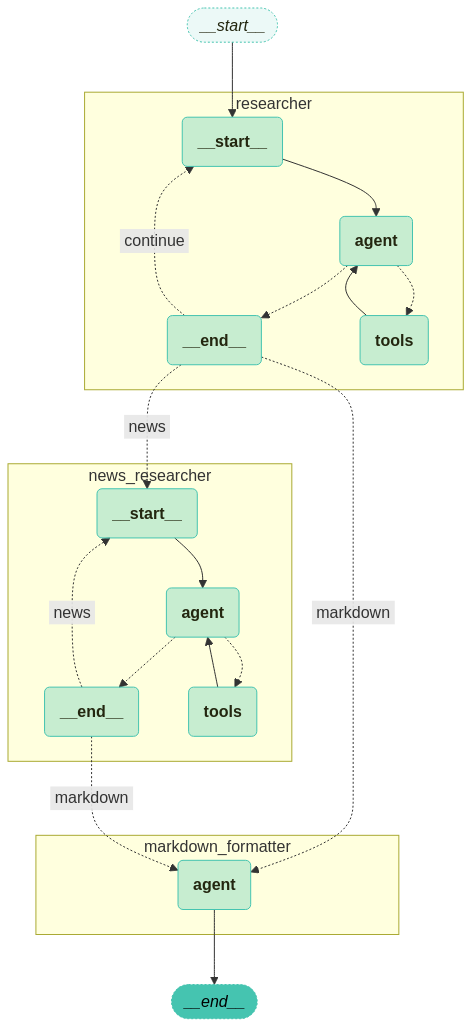

In [29]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(app, xray=True)

In [30]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import random_uuid, invoke_graph
from langchain_core.messages import HumanMessage

# config 설정(재귀 최대 횟수, thread_id)
config = RunnableConfig(recursion_limit=10, configurable={"thread_id": random_uuid()})

inputs = {
    "messages": [
        HumanMessage(
            content="김수현 김새론 사건 관련 뉴스 markdown으로 최종 정리해줘."
        )
    ],
}

# 정확한 노드 이름으로 수정!
invoke_graph(
    app, 
    inputs, 
    config, 
    node_names=["researcher", "news_researcher", "markdown_formatter"]
)



🔄 Node: researcher 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================
Name: researcher

뉴스 관련 요청입니다. news_researcher에게 작업을 위임합니다.

🔄 Node: news_researcher 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
================================ Human Message =================================
Name: news_researcher

김수현과 고(故) 김새론 사건 관련 뉴스 요약입니다.

## 사건 배경
- 김수현과 김새론의 유족 간에 갈등이 심화되고 있으며, 갈등의 핵심은 두 사람의 교제 시기에 대한 의견 차이입니다.
- 유족 측은 김수현과 김새론이 2015년부터 6년간 교제했다고 주장하며 공개 사과를 요구하고 있습니다. 반면 김수현 측은 2019년 여름부터 2020년 가을까지 교제했다고 주장하고 있습니다. 

## 유족과 김수현의 공식 입장
- 김수현의 소속사 골드메달리스트는 유족 측의 주장을 허위 사실 유포로 간주하고 공식 입장을 발표했습니다.
- 유족 측은 고 김새론이 김수현에게 "살려달라"고 메시지를 보냈다는 주장도 하고 있습니다. 이에 대해 골드메달리스트 측은 채무 변제를 촉구하기 위한 내용증명이었다고 반박하고 있습니다.

## 사건의 진전
- 김새론의 변호사에 따르면, 유족이 김수현에게 보내는 2차 내용증명은 가족이 이사 중 발견한 것이며, 김새론은 1차 내용증명을 처음 믿지 않았다고 주장하기도 했습니다.
- 유족은 김수현이 협박을 했다고 해석하고 있으며, 법적 대응도 예고하고 있습니다.

## 최근 언급된 발언 및 사회적 반응
- 문화평론가 김갑수가 논란의 발언을 해 비판받고, 방

In [53]:
! pip uninstall  reportlab 

^C


In [ ]:
! pip uninstall weasyprint[cairo]

^C


In [44]:
! pip uninstall weasyprint

^C


In [57]:
markdown_text = """
김수현과 고(故) 김새론 사건 관련 뉴스 요약입니다.

## 사건 배경
- 김수현과 김새론의 유족 간에 갈등이 심화되고 있으며, 갈등의 핵심은 두 사람의 교제 시기에 대한 의견 차이입니다.
- 유족 측은 김수현과 김새론이 2015년부터 6년간 교제했다고 주장하며 공개 사과를 요구하고 있습니다. 반면 김수현 측은 2019년 여름부터 2020년 가을까지 교제했다고 주장하고 있습니다. 

## 유족과 김수현의 공식 입장
- 김수현의 소속사 골드메달리스트는 유족 측의 주장을 허위 사실 유포로 간주하고 공식 입장을 발표했습니다.
- 유족 측은 고 김새론이 김수현에게 "살려달라"고 메시지를 보냈다는 주장도 하고 있습니다. 이에 대해 골드메달리스트 측은 채무 변제를 촉구하기 위한 내용증명이었다고 반박하고 있습니다.
...
- 사회적 관심 집중, 논란 확산함.

"""

In [ ]:
import markdown

@tool 
def convert_text_to_markdown(input_text: str, output_md_path: str = None):
    """
    일반 텍스트를 Markdown 형식으로 변환하는 함수.

    Args:
        input_text (str): 변환할 일반 텍스트
        output_md_path (str): 저장할 Markdown 파일 경로 (선택 사항)

    Returns:
        str: 변환된 Markdown 텍스트
    """
    md_content = markdown.markdown(input_text)

    # Markdown 파일로 저장할 경우
    if output_md_path:
        with open(output_md_path, "w", encoding="utf-8") as f:
            f.write(md_content)

    return md_content

In [61]:
convert_text_to_markdown(input_text=markdown_text, output_md_path="C:/Users/user/Desktop/agent/data/data.md")

'<p>김수현과 고(故) 김새론 사건 관련 뉴스 요약입니다.</p>\n<h2>사건 배경</h2>\n<ul>\n<li>김수현과 김새론의 유족 간에 갈등이 심화되고 있으며, 갈등의 핵심은 두 사람의 교제 시기에 대한 의견 차이입니다.</li>\n<li>유족 측은 김수현과 김새론이 2015년부터 6년간 교제했다고 주장하며 공개 사과를 요구하고 있습니다. 반면 김수현 측은 2019년 여름부터 2020년 가을까지 교제했다고 주장하고 있습니다. </li>\n</ul>\n<h2>유족과 김수현의 공식 입장</h2>\n<ul>\n<li>김수현의 소속사 골드메달리스트는 유족 측의 주장을 허위 사실 유포로 간주하고 공식 입장을 발표했습니다.</li>\n<li>유족 측은 고 김새론이 김수현에게 "살려달라"고 메시지를 보냈다는 주장도 하고 있습니다. 이에 대해 골드메달리스트 측은 채무 변제를 촉구하기 위한 내용증명이었다고 반박하고 있습니다.\n...</li>\n<li>사회적 관심 집중, 논란 확산함.</li>\n</ul>'

In [22]:
! pip install langchain_teddynote

  Using cached kiwipiepy-0.20.4-cp310-cp310-win_amd64.whl.metadata (1.3 kB)
  Using cached rank_bm25-0.2.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached pinecone_client-6.0.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached pinecone_text-0.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached olefile-0.47-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached pdf2image-1.17.0-py3-none-any.whl.metadata (6.2 kB)
  Using cached anthropic-0.49.0-py3-none-any.whl.metadata (24 kB)
  Using cached feedparser-6.0.11-py3-none-any.whl.metadata (2.4 kB)
  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached sgmllib3k-1.0.0-py3-none-any.whl
  Using cached kiwipiepy_model-0.20.0-py3-none-any.whl
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached pinecone_plugin_interface-0.0.7-py3-none-any.whl.metadata (1.2 kB)
  Using cached lz4-4.4.3-cp310-cp310-win_amd64.whl.metadata

In [45]:
! pip install langchain_openai

  Using cached tiktoken-0.9.0-cp310-cp310-win_amd64.whl.metadata (6.8 kB)
  Using cached regex-2024.11.6-cp310-cp310-win_amd64.whl.metadata (41 kB)
Using cached tiktoken-0.9.0-cp310-cp310-win_amd64.whl (894 kB)
Using cached regex-2024.11.6-cp310-cp310-win_amd64.whl (274 kB)


In [31]:
def duckduckgo_news_search(query: str, region: str = "ko-kr", max_result: int = 5) -> List[dict]:
    """_summary_

    Args:
        query (str): input text search 
        region (str, optional): region . Defaults to "ko-kr".
        max_result (int, optional): result len. Defaults to 5.

    Returns:
        List[dict]: news list
    """
    wrapper = DuckDuckGoSearchAPIWrapper(region=region, time="d", max_results=max_result)
    search = DuckDuckGoSearchResults(api_wrapper=wrapper, source="news", output_format="list")
    results = search.run(query)
    return results

In [37]:
duckduckgo_news_search("김수현 김새론 사건")

[{'snippet': '한눈에 보는 오늘 : 사회 - 뉴스 : 김새론, 김수현 /사진=변성현 한경닷컴 기자고(故) 김새론이 골드메달리스트로부터 받은 1, 2차 내용증명을 확인한 결과 채무변제를 강경하게 촉구하던 소속사가 김수현과의 사진 공개 후 "채무 변제와 방법을 협의하자"며 입장을 다소 바꾼 것으로 확인됐다.',
  'title': '[단독] 김수현 측, 김새론 사진 공개에 태도 돌변…"협의 의사" : 네이트 뉴스',
  'link': 'https://news.nate.com/view/20250318n11338'},
 {'snippet': '배우 김수현(왼쪽)과 고 김새론 경향신문 자료사진 ... 시기 등에 있어 전향적으로 협의할 의사가 있다"면서 "이 사건 채무와 관련해 의뢰인 회사 소속 임직원 또는 배우들에게 연락하는 일은 삼가해 줄 것을 요청한다"고 했다.',
  'title': '김수현 측, 김새론에 "직접 연락하지 말라" 내용증명 압박 - 스포츠경향',
  'link': 'https://sports.khan.co.kr/article/202503181103003'},
 {'snippet': '김새론 유족의 법률대리인인 법무법인 부유의 부지석 대표변호사는 17일 오후 서울경찰청 앞에서 기자회견을 열고 "김수현 소속사가 1차 내용증명을 보낸 후 고인이 김수현에게 \'살려 달라\'는 문자를 보내자 김수현은 연락 한 통 없었고 대신 소속사를 통해 2 ...',
  'title': '김새론 사진 올리자 "법적문제"…김수현 \'2차 내용증명\' 보니',
  'link': 'https://www.kmib.co.kr/article/view.asp?arcid=0027871125'},
 {'snippet': '사진=텐아시아DB 고(故) 김새론 측이 김수현 측에게 2차 내용증명을 받았다고 폭로했다. 김새론 유족의 법률대리인인 법무법인 부유의 부지석 대표 ...',
  'title': '종합 故 김새론 김수현 지켜주려 했는데…유족 측 2차 내용증명→친동생 증언 폭로 |

In [ ]:
from pydantic import BaseModel
from bs4 import BeautifulSoup as bs 
import requests
from langchain.chat_models import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.summarize import load_summarize_chain
from langchain import PromptTemplate
from langchain.tools import tool  # @tool 데코레이터
from langchain.schema import BaseMessage, AIMessage
from typing import TypedDict, Sequence, Annotated

def content_crawler(url: str) -> str:
    """_summary_


    Args:
        url (str): Duck Duck Go Search 통해 파싱한 링크

    Returns:
        str: 정리된 내용 
    """
    try:
        headers = {
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36"
        }
        
        for result in url:
            urls = result["link"]
            
            response = requests.get(urls, headers=headers, timeout=10)
            soup = bs(response.text, "lxml")
            text_content = soup.get_text(separator="\n", strip=True)
            text_splitter = RecursiveCharacterTextSplitter(
                separators=["\n\n", "\n"], chunk_size=10000, chunk_overlap=500
            )
            docs = text_splitter.create_documents([text_content])
            
            return docs
    except Exception as e:
        return f"Error: {str(e)}"


[Document(metadata={}, page_content='[단독] 김수현 측, 김새론 사진 공개에 태도 돌변…"협의 의사" : 네이트 연예\nNATE\n연예\n뉴스\n스포츠\n판\n날씨\n네이트 메인으로\n|\n사이트맵\n검색영역\n검색\n홈\n연예가화제\n방송/가요\n영화\n해외연예\nPOLL\n포토/TV\n아이돌24시\n[단독] 김수현 측, 김새론 사진 공개에 태도 돌변…"협의 의사"\n한국경제\n원문\n기사전송\n2025-03-18 10:31\n최종수정\n2025-03-18 14:09\n-\n-\n공유하기\n네이트온\n페이스북\n엑스\nURL복사\nAI\n챗으로 요약\n가\n1\n작게\n가\n2\n보통\n가\n3\n크게\n가\n4\n아주\n크게\n가\n5\n가장\n크게\nAI\n요약\n기사 제목과 본문 내용을 자동 요약한 내용입니다.\n전체 내용을 이해하기 위해서는 기사 본문 전체를 확인하는 것이 더 좋습니다.\nAI\n챗이 열심히 분석 중입니다. 잠시만 기다려주세요.\nAI\n챗\n바로가기\n김새론 측 "사실상 법적대응 하겠다는 협박"\n소속사 "김새론과 골드메달리스트 사이 문제"\n김새론, 김수현 /사진=변성현 한경닷컴 기자\n고(故) 김새론이 골드메달리스트로부터 받은 1, 2차 내용증명을 확인한 결과 채무변제를 강경하게 촉구하던 소속사가 김수현과의 사진 공개 후 "채무 변제와 방법을 협의하자"며 입장을 다소 바꾼 것으로 확인됐다.\n한경닷컴이 18일 입수한 내용증명 2건 중 첫번째 문서에는 "골드메달리스트이 대리인으로서 다음과 같이 귀하에 대하여 채무변제를 촉구한다"는 내용이 담겼다. 해당 내용증명은 2024년 3월 15일 자로 발송됐으며 의뢰인란엔 \'골드메달리스트\'가, 수신인엔 김새론의 개명 후 이름인 \'김아임\'이 기재되어 있다.\n이어 "2022년 11월 22일 의뢰인으로부터 6억8640만9653원을 차용하며 이를 2023년 12월 31일까지 변제하기로 하는 금전소비대차계약을 체결한 바 있다"며 "귀하는 대여금 채무의 변제기가 도

In [72]:
def tavily_search(query: str) -> str:
    """
    주어진 질문을 Tavily로 검색하고 결과를 텍스트로 반환합니다.
    """
    search_results = tavily_client.search(
        query=query, 
        max_results=5, 
        search_depth="advanced", 
        include_raw_content=True
    )

    aggregated_results = "\n\n".join([
        f"제목: {res['title']}\n링크: {res['url']}\n내용: {res['content']}"
        for res in search_results['results']
    ])

    return aggregated_results

In [73]:
tavily_search("김수현")

'제목: 김수현 (1988년) - 위키백과, 우리 모두의 백과사전\n링크: https://ko.wikipedia.org/wiki/%EA%B9%80%EC%88%98%ED%98%84_(1988%EB%85%84)\n내용: 김수현은 1988년 2월 16일 서울특별시에서 태어났다. 그는 서울특별시 강남구 소재의 초등학교, 중학교, 그리고 고등학교를 졸업했다.[1] 그의 아버지는 1980년대 \'말하라 사랑이 어떻게 왔는가를\', \'밤부두\' 등을 히트 시키며 활약했던 록밴드 세븐돌핀스의 보컬로 유명한 김충훈으로 알려졌다.[2] 김수현은 가난한 환경에서 자랐지만, 어머니의 권유로 아들의 워낙 내성적인 성격을 너무 걱정한 나머지 고등학교에 진학할 무렵, “웅변학원이라도 다닐래?”라고 권유해 봤지만 김수현은 선뜻 용기를 내지 못했고, “그럼 연극이라도 해볼래?” 어머니의 또 다른 권유로 시작한 연극은 그의 성격을 조금씩 바꿔나가게 되었다. 김수현의 고등학교 3학년 담임교사는 당시 김수현에 대해 “학교에 대본을 가져와서 틈틈이 외우고 발성연습도 했다. 그런 모습을 보며 수현이가 연기자의 길을 걷는다고 해도 손색이 없겠다고 생각을 했다”고 언급했다.[3][4] [...] 목차\n\n김수현 (1988년)\n\n\n\n김수현\n2024년 모습\n출생 | 1988년 2월 16일(1988-02-16)(37세)대한민국서울특별시강남구일원동\n국적 | 대한민국\n다른이름 | Kim Soo-hyun\n직업 | 배우\n활동기간 | 2007년~현재\n종교 | 개신교\n웹사이트 | 김수현 골드메달리스트김수현 인스타그램김수현 웨이보\n김수현(金秀賢, 1988년 2월 16일~)은 대한민국의 배우이다..\n\n신체: 178cm AB형\n\n학력\n\n성장 과정 [...] 2007 ~ 2010\xa0: 초기 경력\n\n김수현은 2007년 7월 말부터 방송 된 MBC 일일시트콤 《김치 치즈 스마일》에서 수영부원 김수현 역할을 연기하며 연예계에 정식 데뷔했다.[9] 톱스타이자 정치인이었던 김을동 선배는 M

In [1]:
! pip install langchain_mcp_adapters

In [7]:
! pip install langchain_teddynote